In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


## 鈴木さんの場合

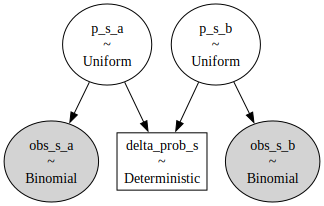

In [2]:
with pm.Model() as model_s:
    p_s_a = pm.Uniform("p_s_a", lower=0.0, upper=1.0)
    p_s_b = pm.Uniform("p_s_b", lower=0.0, upper=1.0)

    obs_s_a = pm.Binomial("obs_s_a", p=p_s_a, n=40, observed=2)
    obs_s_b = pm.Binomial("obs_s_b", p=p_s_b, n=25, observed=2)

    delta_prob_s = pm.Deterministic("delta_prob_s", p_s_b - p_s_a)

g = pm.model_to_graphviz(model_s)
display(g)

In [3]:
with model_s:
    idata_s = pm.sample(random_seed=42, chains=2, target_accept=0.99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p_s_a, p_s_b]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


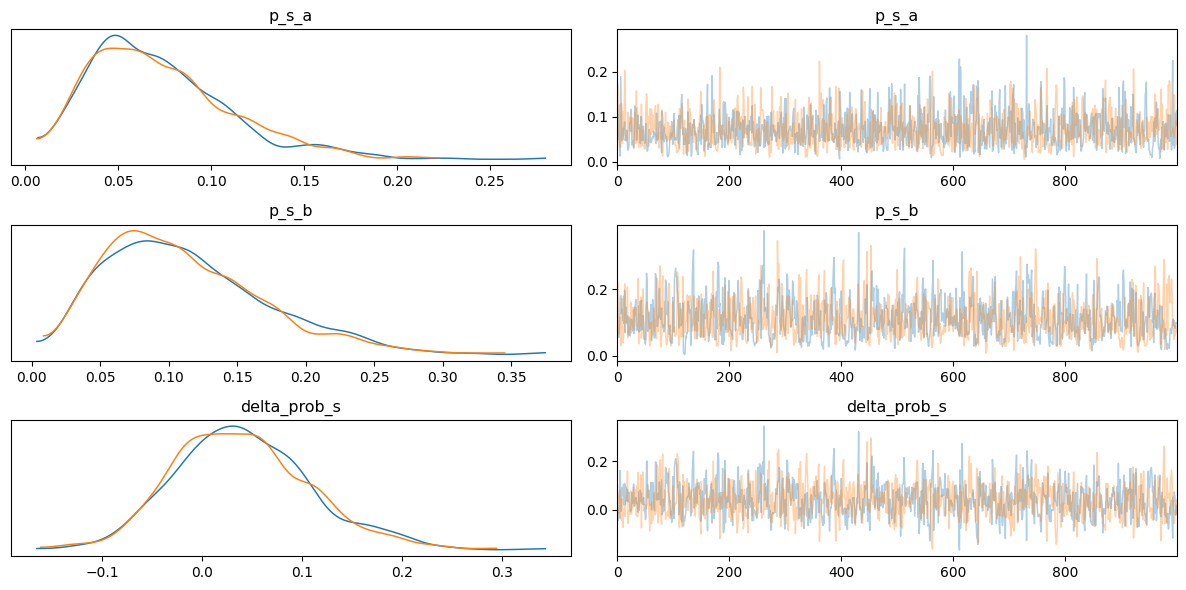

In [4]:
az.plot_trace(idata_s, compact=False)
plt.tight_layout()

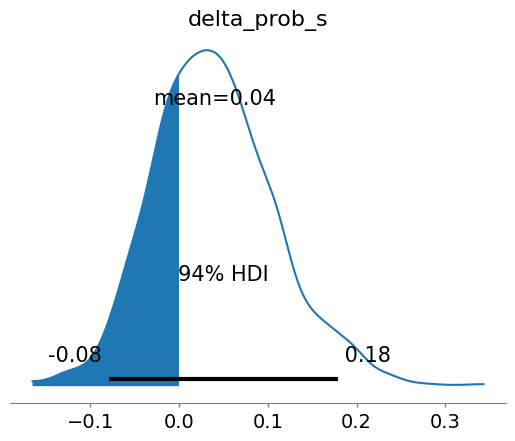

In [5]:
ax = az.plot_posterior(idata_s, var_names=["delta_prob_s"])
xx, yy = ax.get_lines()[0].get_data()
ax.fill_between(xx[xx < 0], yy[xx < 0])

In [6]:
delta_prob_s = idata_s["posterior"]["delta_prob_s"]
delta_prob_s_values = delta_prob_s.to_numpy().flatten()

n1_s = (delta_prob_s_values < 0).sum()
n_s = delta_prob_s_values.size
n1_rate_s = n1_s / n_s
print(f"鈴木さんケース　画面 A の方がクリック率が高い確率: {n1_rate_s * 100:.02f}%")

鈴木さんケース　画面 A の方がクリック率が高い確率: 29.45%


## 山田さんの場合

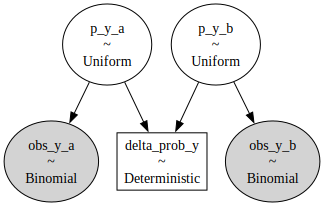

In [7]:
with pm.Model() as model_y:
    p_y_a = pm.Uniform("p_y_a", lower=0.0, upper=1.0)
    p_y_b = pm.Uniform("p_y_b", lower=0.0, upper=1.0)

    obs_y_a = pm.Binomial("obs_y_a", p=p_y_a, n=1200, observed=60)
    obs_y_b = pm.Binomial("obs_y_b", p=p_y_b, n=1600, observed=110)

    delta_prob_y = pm.Deterministic("delta_prob_y", p_y_b - p_y_a)


g = pm.model_to_graphviz(model_y)
display(g)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [p_y_a, p_y_b]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


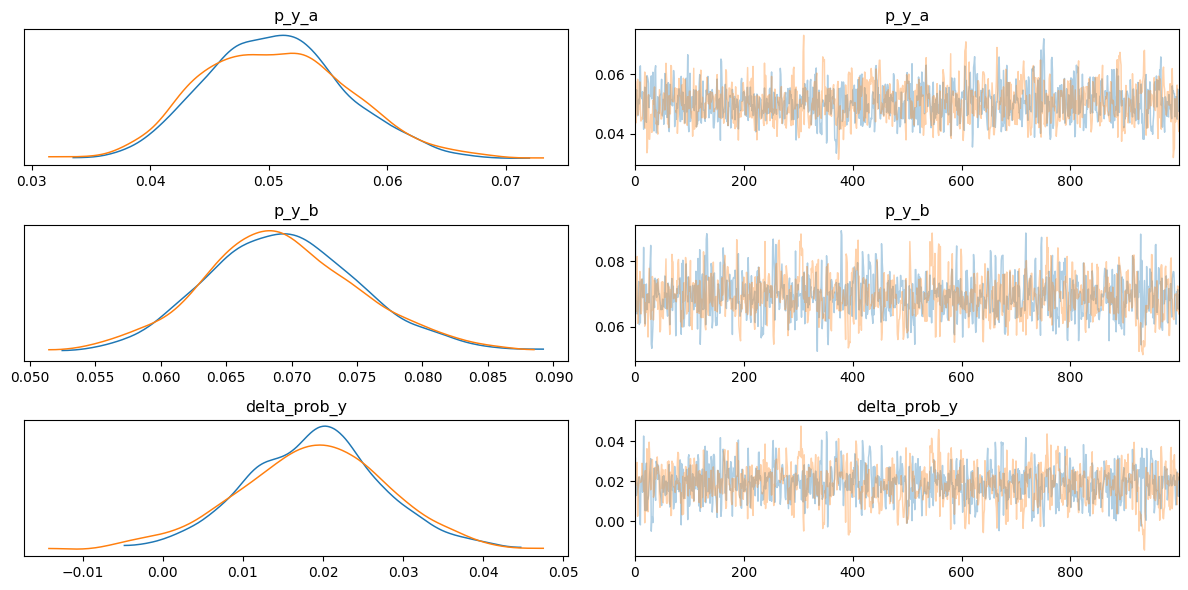

In [8]:
with model_y:
    idata_y = pm.sample(random_seed=42, chains=2, target_accept=0.99)

ax = az.plot_trace(idata_y, compact=False)
plt.tight_layout()

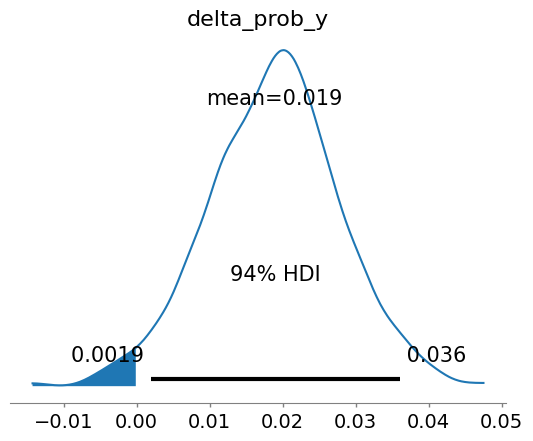

In [9]:
ax = az.plot_posterior(idata_y, var_names=["delta_prob_y"])
xx, yy = ax.get_lines()[0].get_data()
ax.fill_between(xx[xx < 0], yy[xx < 0])

In [10]:
delta_prob_y = idata_y["posterior"]["delta_prob_y"]
delta_prob_y_values = delta_prob_y.to_numpy().flatten()

n1_y = (delta_prob_y_values < 0).sum()
n_y = delta_prob_y_values.size
n1_rate_y = n1_y / n_y
print(f"山田さんケース　画面 A の方がクリック率が高い確率: {n1_rate_y * 100:.02f}%")

山田さんケース　画面 A の方がクリック率が高い確率: 2.30%


## 確率モデルを直接使った別解

Sampling: [p_a, p_b]


Text(0.5, 1.0, 'suzuki 29.85%')

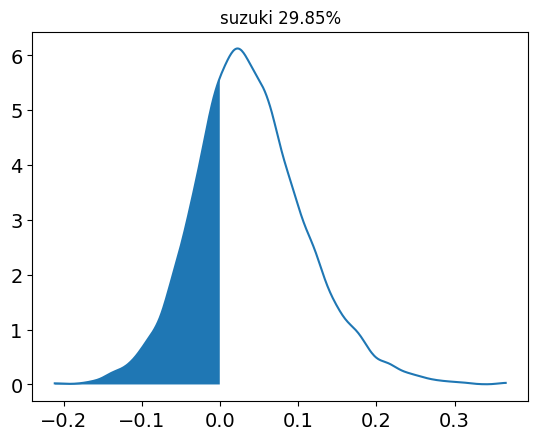

In [11]:
alpha_a = 2 + 1
beta_a = 38 + 1

alpha_b = 2 + 1
beta_b = 23 + 1

with pm.Model() as model_s2:
    p_a = pm.Beta("p_a", alpha=alpha_a, beta=beta_a)
    p_b = pm.Beta("p_b", alpha=alpha_b, beta=beta_b)

    samples_s2 = pm.sample_prior_predictive(random_seed=42, samples=10000)

p_a_samples_s2 = samples_s2["prior"]["p_a"].to_numpy().flatten()
p_b_samples_s2 = samples_s2["prior"]["p_b"].to_numpy().flatten()
delta_a_b_s2 = p_b_samples_s2 - p_a_samples_s2

n1_s2 = (delta_a_b_s2 < 0).sum()
n_s2 = delta_a_b_s2.size
n1_rate_s2 = n1_s2 / n_s2

ax = az.plot_dist(delta_a_b_s2)
xx, yy = ax.get_lines()[0].get_data()
ax.fill_between(xx[xx < 0], yy[xx < 0])
ax.set_title(f"suzuki {n1_rate_s2 * 100:.02f}%")

Sampling: [p_a, p_b]


Text(0.5, 1.0, 'yamada 1.81%')

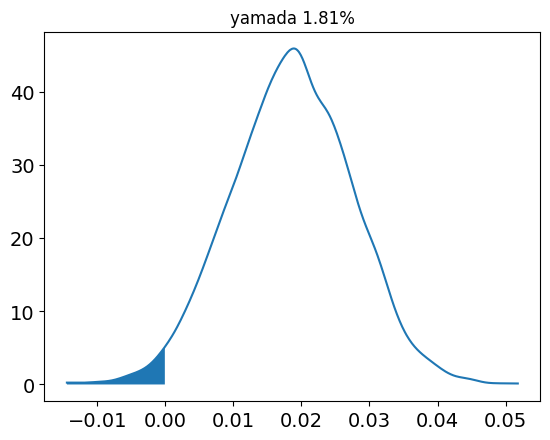

In [12]:
alpha_a = 60 + 1
beta_a = 1140 + 1

alpha_b = 110 + 1
beta_b = 1490 + 1

with pm.Model() as model_y2:
    p_a = pm.Beta("p_a", alpha=alpha_a, beta=beta_a)
    p_b = pm.Beta("p_b", alpha=alpha_b, beta=beta_b)

    samples_y2 = pm.sample_prior_predictive(random_seed=42, samples=10000)

p_a_samples_y2 = samples_y2["prior"]["p_a"].to_numpy().flatten()
p_b_samples_y2 = samples_y2["prior"]["p_b"].to_numpy().flatten()
delta_a_b_y2 = p_b_samples_y2 - p_a_samples_y2

n1_y2 = (delta_a_b_y2 < 0).sum()
n_y2 = delta_a_b_y2.size
n1_rate_y2 = n1_y2 / n_y2

ax = az.plot_dist(delta_a_b_y2)
xx, yy = ax.get_lines()[0].get_data()
ax.fill_between(xx[xx < 0], yy[xx < 0])
ax.set_title(f"yamada {n1_rate_y2 * 100:.02f}%")